In [1]:
from pathlib import Path
import pandas as pd
from alphalens.tears import create_summary_tear_sheet
from alphalens.utils import get_clean_factor_and_forward_returns

In [2]:
# GLOBAL SETTINGS

# Directories
model_dataDir = 'DATA/MODELDATA/'
model_plot_dataDir = 'DATA/MODELRESULTS/'

# Time
START = 2021
END = 2022



#Helpers
idx = pd.IndexSlice



In [3]:
# Helper Functions
def get_trade_prices(start, stop):
    model_mdf = pd.read_csv(model_dataDir + 'ModelData.csv')
    model_mdf.rename(columns={'Unnamed: 0': 'Dates'}, inplace=True)
    model_mdf['Dates'] = pd.to_datetime(model_mdf['Dates'])
    model_mdf.set_index(['Dates', 'Coin'], inplace=True)
    model_mdf = model_mdf.loc[:,'Open']
    #model_mdf = model_mdf.loc[idx[Coin, str(START):str(END)], 'Open']
    prices = model_mdf.unstack('Coin').sort_index().shift(-1).tz_localize('UTC')
    
    return prices



def get_best_alpha(scores):
    return scores.groupby('alpha').ic.mean().idxmax()


def get_factor(predictions):
    return (predictions.unstack('Coin')
            .dropna(how='all')
            .stack()
            .tz_localize('UTC', level='Dates')
            .sort_index())    

In [4]:
# Load the Model Results Data
lr_predictions = pd.read_hdf(f'{model_dataDir}lr_model_predictions.h5', 'lr/predictions')
ridge_scores = pd.read_hdf(f'{model_dataDir}Ridge_Scores.h5', 'ridge/scores')
ridge_predictions = pd.read_hdf(f'{model_dataDir}Ridge_Predictions.h5', 'ridge/predictions')
lasso_scores = pd.read_hdf(f'{model_dataDir}Lasso_Scores.h5', 'lasso/scores')
lasso_predictions = pd.read_hdf(f'{model_dataDir}Lasso_Predictions.h5', 'lasso/predictions')

# Load the OHLV Price data
#model_mdf = pd.read_csv(model_dataDir + 'ModelData.csv')
#model_mdf.rename(columns={'Unnamed: 0': 'Dates'}, inplace=True)
#model_mdf['Dates'] = pd.to_datetime(model_mdf['Dates'])
#model_mdf.set_index(['Dates', 'Coin'], inplace=True)
#model_mdf = model_mdf.loc[:,'Open':'Volume']
#prices = model_mdf.unstack('Coin').sort_index().shift(-1).tz_localize('UTC')

In [5]:
# Now we will check the Alpha and Beta metrics of the signals found by our models in the prior step

In [6]:
# From Linear Regression
lr_factor = get_factor(lr_predictions.predicted.swaplevel())
lr_factor.head()

Dates                      Coin                 
2020-08-04 00:00:00+00:00  algorand                 0.007506
                           arweave                  0.003944
                           basic-attention-token    0.003297
                           binancecoin              0.004078
                           bitcoin                 -0.008336
dtype: float64

In [7]:
trade_prices = get_trade_prices(START, END)
#trade_prices.info()

In [8]:
#trade_prices = trade_prices.loc['2021':]
trade_prices = trade_prices.loc[str(START):]

In [9]:
trade_prices.head()

Coin,algorand,arweave,basic-attention-token,binancecoin,bitcoin,bitcoin-cash,bitcoin-cash-sv,bittorrent-old,blockstack,cardano,...,ripple,stellar,terra-luna,tezos,theta-fuel,theta-token,thorchain,tron,vechain,zcash
Dates,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00+00:00,0.438502,2.670504,0.205343,37.503464,29382.121100,339.711526,163.334378,0.000300,0.439503,0.174338,...,0.234806,0.132464,0.639394,2.011738,0.034862,2.119562,1.291906,0.026994,0.019236,57.960370
2021-01-02 00:00:00+00:00,0.413708,2.719557,0.204712,38.252001,33611.431863,363.455141,164.232060,0.000315,0.467492,0.178057,...,0.225612,0.127765,0.652330,2.003735,0.037459,2.374730,1.325755,0.027402,0.020298,58.446835
2021-01-03 00:00:00+00:00,0.441579,2.685954,0.226148,41.512179,33254.268233,433.474317,181.197682,0.000327,0.476318,0.226212,...,0.239294,0.148191,0.710914,2.254962,0.032257,2.208618,1.540146,0.030824,0.026069,62.345988
2021-01-04 00:00:00+00:00,0.417045,2.662170,0.223847,39.810655,31341.982584,402.743345,163.984933,0.000297,0.476224,0.216092,...,0.231002,0.158173,0.665542,2.206657,0.030295,2.082054,1.555606,0.028087,0.024352,58.233601
2021-01-05 00:00:00+00:00,0.465204,2.987974,0.231677,41.033756,35324.129280,428.929500,170.090780,0.000307,0.510003,0.267811,...,0.228446,0.210890,0.712575,2.403575,0.031552,2.233246,1.509832,0.028487,0.029294,60.528660


In [10]:
trade_prices.tail()

Coin,algorand,arweave,basic-attention-token,binancecoin,bitcoin,bitcoin-cash,bitcoin-cash-sv,bittorrent-old,blockstack,cardano,...,ripple,stellar,terra-luna,tezos,theta-fuel,theta-token,thorchain,tron,vechain,zcash
Dates,,,,,,,,,,,,,,,,,,,,,
2022-02-12 00:00:00+00:00,0.918217,33.111447,0.805119,403.370747,42283.267643,329.144135,93.923434,0.001680,1.537870,1.048932,...,0.823011,0.216219,53.433985,4.020813,0.201984,3.844973,4.037745,0.063998,0.057096,116.602739
2022-02-13 00:00:00+00:00,0.886295,31.423065,0.789059,394.450842,42013.897363,323.870062,91.565161,0.001619,1.441699,1.034247,...,0.795925,0.209051,52.870170,3.788488,0.190022,3.488803,3.904846,0.064263,0.055807,115.443126
2022-02-14 00:00:00+00:00,0.922794,33.188473,0.829076,416.348931,43535.738493,334.879584,94.600103,0.001697,1.499779,1.070399,...,0.822834,0.214476,54.938593,4.034886,0.205292,3.668343,4.252512,0.065549,0.057808,124.800243
2022-02-15 00:00:00+00:00,0.958672,34.039041,0.840289,430.162619,43933.667693,334.843523,96.005327,0.001652,1.550662,1.088921,...,0.833197,0.217058,56.174709,4.052083,0.216146,3.807178,4.336983,0.066002,0.059857,122.779989
2022-02-16 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Get forward returns and Quantiles
lr_factor_data = get_clean_factor_and_forward_returns(factor=lr_factor,
                                                      prices=trade_prices,
                                                      quantiles=5,
                                                      #periods=(1, 7, 14, 30, 60, 90))
                                                      periods=(1, 7, 14, 30))

lr_factor_data.info()

Dropped 28.2% entries from factor data: 28.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21392 entries, (Timestamp('2021-01-01 00:00:00+0000', tz='UTC', freq='C'), 'algorand') to (Timestamp('2022-01-17 00:00:00+0000', tz='UTC', freq='C'), 'zcash')
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1D               21392 non-null  float64
 1   7D               21392 non-null  float64
 2   14D              21392 non-null  float64
 3   30D              21392 non-null  float64
 4   factor           21392 non-null  float64
 5   factor_quantile  21392 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.1+ MB


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.173914,0.064839,-0.010964,0.024544,4584,21.428571
2,-0.071891,0.073158,0.005388,0.022268,4202,19.642857
3,-0.060586,0.081280,0.012722,0.023228,4202,19.642857
4,-0.052203,0.093866,0.019766,0.024263,4202,19.642857
5,-0.039628,0.905281,0.033436,0.031300,4202,19.642857


Returns Analysis


,1D,7D,14D,30D
Ann. alpha,2.533,1.967,1.209,0.400
beta,0.010,0.186,0.328,0.659
Mean Period Wise Return Top Quantile (bps),49.221,67.594,74.154,107.646
Mean Period Wise Return Bottom Quantile (bps),-52.664,-57.024,-61.642,-86.365
Mean Period Wise Spread (bps),101.885,121.101,119.924,105.003


Information Analysis


,1D,7D,14D,30D
IC Mean,0.062,0.121,0.145,0.188
IC Std.,0.182,0.197,0.206,0.228
Risk-Adjusted IC,0.341,0.617,0.704,0.826
t-stat(IC),6.660,12.052,13.764,16.140
p-value(IC),0.000,0.000,0.000,0.000
IC Skew,-0.069,-0.000,0.038,0.125
IC Kurtosis,-0.572,-0.131,-0.502,-0.480


Turnover Analysis


,1D,7D,14D,30D
Quantile 1 Mean Turnover,0.332,0.613,0.685,0.760
Quantile 2 Mean Turnover,0.570,0.754,0.782,0.798
Quantile 3 Mean Turnover,0.604,0.765,0.785,0.794
Quantile 4 Mean Turnover,0.573,0.752,0.762,0.797
Quantile 5 Mean Turnover,0.356,0.653,0.678,0.753


,1D,7D,14D,30D
Mean Factor Rank Autocorrelation,0.731,0.285,0.197,0.053


<Figure size 432x288 with 0 Axes>

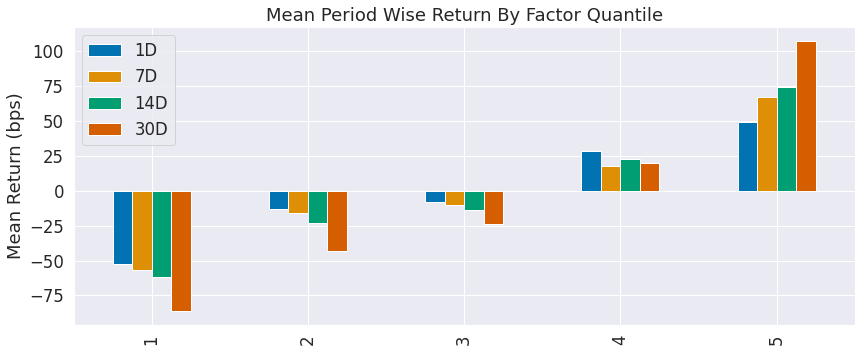

In [12]:
create_summary_tear_sheet(lr_factor_data);

In [13]:
# From Ridge
best_ridge_alpha = get_best_alpha(ridge_scores)
ridge_predictions = ridge_predictions[ridge_predictions.alpha==best_ridge_alpha].drop('alpha', axis=1)

In [14]:
ridge_factor = get_factor(ridge_predictions.predicted.swaplevel())
ridge_factor.head()

Dates                      Coin                 
2020-08-04 00:00:00+00:00  algorand                -0.002387
                           arweave                 -0.002908
                           basic-attention-token   -0.005720
                           binancecoin             -0.012505
                           bitcoin                 -0.010806
dtype: float64

In [15]:
ridge_factor_data = get_clean_factor_and_forward_returns(factor=ridge_factor,
                                                         prices=trade_prices,
                                                         quantiles=5,
                                                         periods=(1, 7, 14, 30))
ridge_factor_data.info()

Dropped 28.2% entries from factor data: 28.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21392 entries, (Timestamp('2021-01-01 00:00:00+0000', tz='UTC', freq='C'), 'algorand') to (Timestamp('2022-01-17 00:00:00+0000', tz='UTC', freq='C'), 'zcash')
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1D               21392 non-null  float64
 1   7D               21392 non-null  float64
 2   14D              21392 non-null  float64
 3   30D              21392 non-null  float64
 4   factor           21392 non-null  float64
 5   factor_quantile  21392 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.1+ MB


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.121940,0.037629,-0.012956,0.017030,4584,21.428571
2,-0.055082,0.049090,-0.001869,0.013478,4202,19.642857
3,-0.044848,0.057324,0.003099,0.013505,4202,19.642857
4,-0.034506,0.065284,0.007614,0.013918,4202,19.642857
5,-0.023120,0.674562,0.016041,0.019411,4202,19.642857


Returns Analysis


,1D,7D,14D,30D
Ann. alpha,2.842,2.123,1.497,0.617
beta,0.014,0.212,0.325,0.630
Mean Period Wise Return Top Quantile (bps),54.928,74.128,77.278,109.714
Mean Period Wise Return Bottom Quantile (bps),-59.296,-55.715,-62.470,-89.036
Mean Period Wise Spread (bps),114.223,125.375,134.679,117.051


Information Analysis


,1D,7D,14D,30D
IC Mean,0.070,0.133,0.170,0.211
IC Std.,0.187,0.204,0.205,0.232
Risk-Adjusted IC,0.374,0.651,0.827,0.906
t-stat(IC),7.301,12.725,16.163,17.713
p-value(IC),0.000,0.000,0.000,0.000
IC Skew,-0.035,-0.259,-0.158,0.031
IC Kurtosis,-0.443,-0.217,-0.392,-0.300


Turnover Analysis


,1D,7D,14D,30D
Quantile 1 Mean Turnover,0.328,0.574,0.648,0.733
Quantile 2 Mean Turnover,0.556,0.735,0.770,0.781
Quantile 3 Mean Turnover,0.593,0.749,0.767,0.793
Quantile 4 Mean Turnover,0.558,0.729,0.757,0.786
Quantile 5 Mean Turnover,0.345,0.595,0.650,0.722


,1D,7D,14D,30D
Mean Factor Rank Autocorrelation,0.734,0.387,0.276,0.108


<Figure size 432x288 with 0 Axes>

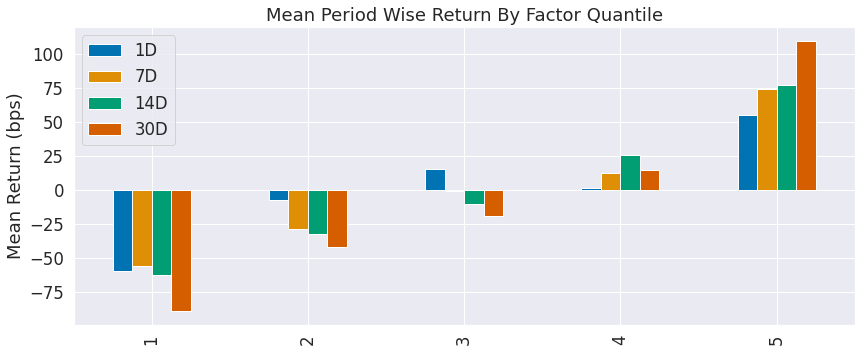

In [16]:
create_summary_tear_sheet(ridge_factor_data);

In [17]:
# From Lasso
best_lasso_alpha = get_best_alpha(lasso_scores)
lasso_predictions = lasso_predictions[lasso_predictions.alpha==best_lasso_alpha].drop('alpha', axis=1)

In [18]:
lasso_factor = get_factor(lasso_predictions.predicted.swaplevel())
lasso_factor.head()

Dates                      Coin                 
2020-08-04 00:00:00+00:00  algorand                -0.001499
                           arweave                 -0.005383
                           basic-attention-token   -0.006603
                           binancecoin             -0.008723
                           bitcoin                 -0.013133
dtype: float64

In [19]:
lasso_factor_data = get_clean_factor_and_forward_returns(factor=lasso_factor,
                                                      prices=trade_prices,
                                                      quantiles=5,
                                                      periods=(1, 7, 14, 30))
lasso_factor_data.info()

Dropped 28.2% entries from factor data: 28.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21392 entries, (Timestamp('2021-01-01 00:00:00+0000', tz='UTC', freq='C'), 'algorand') to (Timestamp('2022-01-17 00:00:00+0000', tz='UTC', freq='C'), 'zcash')
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1D               21392 non-null  float64
 1   7D               21392 non-null  float64
 2   14D              21392 non-null  float64
 3   30D              21392 non-null  float64
 4   factor           21392 non-null  float64
 5   factor_quantile  21392 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.1+ MB


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.163425,0.053578,-0.017901,0.022805,4584,21.428571
2,-0.062836,0.065297,-0.002313,0.018921,4202,19.642857
3,-0.051229,0.076634,0.004568,0.019094,4202,19.642857
4,-0.040856,0.088150,0.011174,0.019569,4202,19.642857
5,-0.033686,0.850178,0.023888,0.026601,4202,19.642857


Returns Analysis


,1D,7D,14D,30D
Ann. alpha,2.645,2.039,1.262,0.430
beta,0.014,0.193,0.336,0.668
Mean Period Wise Return Top Quantile (bps),46.441,72.530,84.115,114.788
Mean Period Wise Return Bottom Quantile (bps),-55.287,-56.820,-61.102,-85.932
Mean Period Wise Spread (bps),101.728,125.277,129.285,115.865


Information Analysis


,1D,7D,14D,30D
IC Mean,0.065,0.124,0.151,0.193
IC Std.,0.183,0.198,0.207,0.231
Risk-Adjusted IC,0.354,0.627,0.733,0.833
t-stat(IC),6.918,12.249,14.320,16.290
p-value(IC),0.000,0.000,0.000,0.000
IC Skew,-0.049,-0.074,-0.004,0.156
IC Kurtosis,-0.479,-0.130,-0.464,-0.568


Turnover Analysis


,1D,7D,14D,30D
Quantile 1 Mean Turnover,0.327,0.609,0.677,0.754
Quantile 2 Mean Turnover,0.567,0.747,0.783,0.794
Quantile 3 Mean Turnover,0.592,0.755,0.781,0.787
Quantile 4 Mean Turnover,0.571,0.752,0.771,0.798
Quantile 5 Mean Turnover,0.357,0.646,0.675,0.748


,1D,7D,14D,30D
Mean Factor Rank Autocorrelation,0.726,0.296,0.208,0.06


<Figure size 432x288 with 0 Axes>

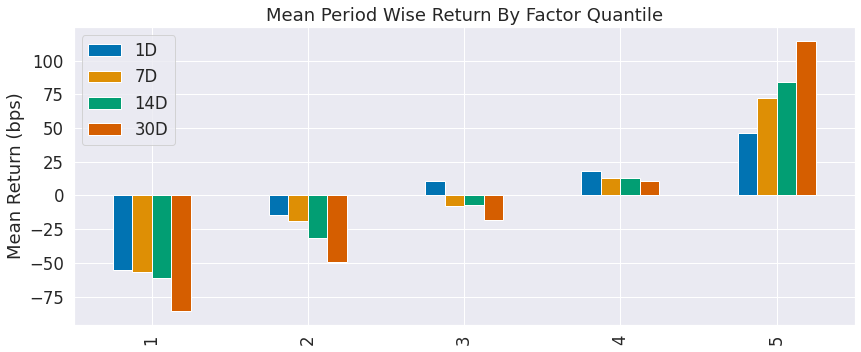

In [20]:
create_summary_tear_sheet(lasso_factor_data);